In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

In [2]:
import numpy as np

In [3]:
import lal
import lalsimulation as lalsim

In [4]:
from scrinet.interfaces import lalutils, rotations

In [5]:
import phenom

In [157]:
# params = lalutils.gen_td_modes_wf_params(m2=5, approximant=lalsim.SEOBNRv4PHM)
# params = lalutils.gen_td_modes_wf_params(m1=100, m2=20, approximant=lalsim.SEOBNRv4PHM, S1x=0.5, S1y=0.5, S2x=0.5, S2y=0.5, f_min=12, f_ref=12, phiRef=1.2)

# params = lalutils.gen_td_modes_wf_params(m2=30, approximant=lalsim.NRSur7dq4, S1x=0.5, S1y=0., f_min=14, f_ref=14)

# m1, m2 = phenom.m1_m2_M_q(60, 5.8)
# chi1x = 0.31
# chi1z = -0.77
# chi1z = 0.77


# m1, m2 = phenom.m1_m2_M_q(60, 6)
# chi1x = 0.15
# chi1z = -0.95

# m1, m2 = phenom.m1_m2_M_q(60, 4.48158646e+00)
# chi1x = 8.66269105e-05
# chi1z = -5.22531923e-01

# m1, m2 = phenom.m1_m2_M_q(60, 5.5666429)
# chi1x = 0.6542267
# chi1z = 0.55597255

# m1, m2 = phenom.m1_m2_M_q(60, 5.99317156)
# chi1x = 0.12822819
# chi1z = -0.96529016

m1, m2 = phenom.m1_m2_M_q(60, 5.85631588)
chi1x = 0.1031752
chi1z = -0.96796393

params = lalutils.gen_td_modes_wf_params(m1=m1, m2=m2, approximant=lalsim.SEOBNRv4PHM, S1x=chi1x, S1z=chi1z, f_min=10, f_ref=10)

In [158]:
from scrinet.workflow import generators

In [159]:
params

{'m1': 51.24894461542808,
 'm2': 8.751055384571925,
 'S1x': 0.1031752,
 'S1y': 0,
 'S1z': -0.96796393,
 'S2x': 0,
 'S2y': 0,
 'S2z': 0,
 'phiRef': 0.0,
 'r': 1,
 'deltaT': 0.000244140625,
 'f_min': 10,
 'f_ref': 10,
 'LALpars': None,
 'lmax': 2,
 'approximant': 52}

In [160]:
times, hlms = lalutils.gen_td_modes_wf(params, eob_all_ell_2_modes=True, modes=[[2,2],[2,1]])
# times, hlms = lalutils.gen_td_modes_wf(params, eob_all_ell_2_modes=False, modes=[[2,2],[2,1],[2,0],[2,-1],[2,-2]])

In [161]:
hlms

{(2,
  2): array([2937.66381129-387.77966221j, 2931.38885345-432.80049393j,
        2924.42388482-477.72039445j, ...,    0.          -0.j        ,
           0.          -0.j        ,    0.          -0.j        ]),
 (2,
  1): array([18.00579405+211.92001673j, 19.62484453+211.73617132j,
        21.24154258+211.54005054j, ...,  0.          -0.j        ,
         0.          -0.j        ,  0.          -0.j        ]),
 (2,
  0): array([-1.07584519e-12+1.70149527e-08j, -7.19115979e-07-6.77824018e-04j,
        -2.87009591e-06-1.46291323e-03j, ...,
         0.00000000e+00-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
         0.00000000e+00-0.00000000e+00j]),
 (2,
  -1): array([18.00579376-211.92001447j, 19.63706413-211.81914555j,
        21.26846472-211.70561811j, ...,  0.          -0.j        ,
         0.          -0.j        ,  0.          -0.j        ]),
 (2,
  -2): array([2937.66381146+387.77966222j, 2931.38285951+432.7999361j ,
        2924.41190599+477.71918247j, ...,    0.       

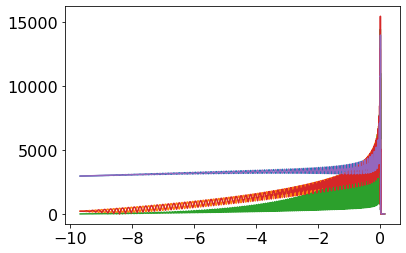

In [162]:
plt.figure()
plt.plot(times, np.abs(hlms[(2,2)]))
plt.plot(times, np.abs(hlms[(2,1)]))
plt.plot(times, np.abs(hlms[(2,0)]))
plt.plot(times, np.abs(hlms[(2,-1)]))
plt.plot(times, np.abs(hlms[(2,-2)]))

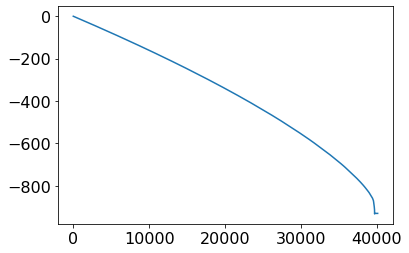

In [163]:
plt.plot(np.unwrap(np.angle(hlms[(2,2)])))

In [164]:
params

{'m1': 51.24894461542808,
 'm2': 8.751055384571925,
 'S1x': 0.1031752,
 'S1y': 0,
 'S1z': -0.96796393,
 'S2x': 0,
 'S2y': 0,
 'S2z': 0,
 'phiRef': 0.0,
 'r': 1,
 'deltaT': 0.000244140625,
 'f_min': 10,
 'f_ref': 10,
 'LALpars': None,
 'lmax': 2,
 'approximant': 52}

In [165]:
thetaJN, alpha0, phi_aligned = rotations.compute_L_to_J_angles(
    mass1=params['m1'], mass2=params['m2'], f_ref=params['f_min'], inc=0, phiref=params['phiRef'],
    spin1x=params['S1x'], spin1y=params['S1y'], spin1z=params['S1z'],
    spin2x=params['S2x'], spin2y=params['S2y'], spin2z=params['S2z'])
print(thetaJN, alpha0, phi_aligned)

2.320517059496423 1.2246467991473532e-16 -0.0


In [166]:
?rotations.WaveformRotations

Init signature: rotations.WaveformRotations(times, hlms, frame, *args, **kwargs)
Docstring:      <no docstring>
Init docstring:
A class to perform rotations to modes
times: 1d array of times
hlms: dict of complex modes
    {(l,m):complex_modes}
alpha0, thetaJN, phi0: angles to go from L (LAL) inertial frame to J inertial frame
frame: str choices: ['inertial-L', 'inertial-J', 'coprec']

if frame is 'inertial-L'
required_args = ['alpha0', 'thetaJN', 'phi0']
passed as kwargs

if frame is 'coprec'
required_args = ['alpha', 'beta', 'gamma']
passed as kwargs

modifies hlms in-place. To find out what frame you are in
use self.frame.
File:           ~/work/git/stk/scrinet/scrinet/interfaces/rotations.py
Type:           type
Subclasses:     


In [167]:
wr = rotations.WaveformRotations(times=times, hlms=hlms, frame='inertial-L', alpha0=alpha0, thetaJN=thetaJN, phi0=phi_aligned)

In [168]:
def plot_modes(wr):
    plt.figure()
    plt.plot(wr.times, np.abs(wr.hlms[(2,2)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,1)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,0)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,-1)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,-2)]))
    plt.title(wr.frame)
    plt.show()
    plt.close()

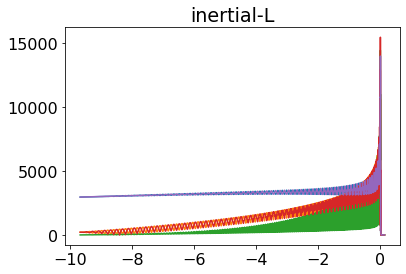

In [169]:
plot_modes(wr)

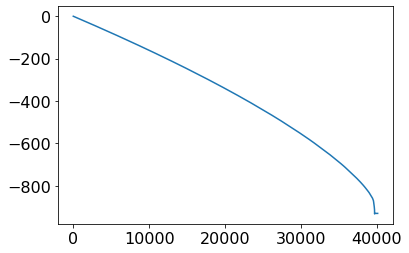

In [170]:
plt.plot(np.unwrap(np.angle(wr.hlms[(2,2)])))

In [171]:
# wr.from_inertial_frame_to_j_frame()

In [172]:
# plt.plot(np.unwrap(np.angle(wr.hlms[(2,2)])))

In [173]:
wr.from_inertial_frame_to_coprecessing_frame()

In [174]:
# wr.from_inertial_frame_to_j_frame()
# wr.from_j_frame_to_coprecessing_frame(func='old')
# wr.from_j_frame_to_coprecessing_frame(func='new')

# wr.from_j_frame_to_coprecessing_frame(func='new', RoughDirectionIndex=1000)

# wr.from_j_frame_to_coprecessing_frame(func='new', RoughDirectionIndex=0, RoughDirection=np.array([0,0,-1]))

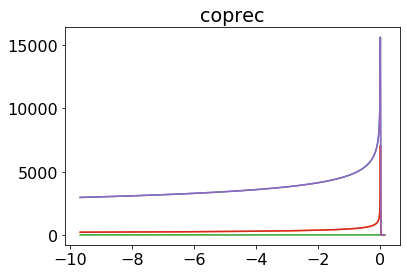

In [175]:
plot_modes(wr)

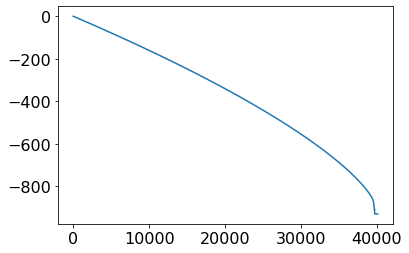

In [176]:
plt.plot(np.unwrap(np.angle(wr.hlms[(2,2)])))

(-0.9, 0)

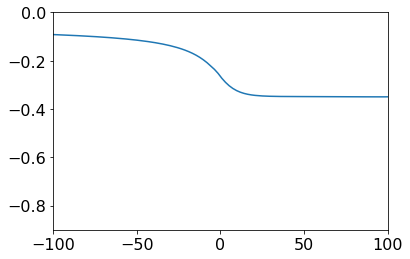

In [177]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
# convert to dimensionless units
t = phenom.StoM(wr.times, m1+m2)
t_min=-1000
t_max=100
new_times = np.linspace(t_min, t_max, 500)
h22 = wr.hlms[(2,2)]
mask = (t >= t_min) & (t < t_max)
t = t[mask]
h22 = h22[mask]

phase = np.unwrap(np.angle(h22))

iphase = IUS(t, phase)
phase = iphase(new_times)
freq = IUS(new_times, phase).derivative()(new_times)


plt.plot(new_times, freq)
plt.xlim(-100,100)
plt.ylim(-0.9,0)

In [178]:
wr.from_coprecessing_frame_to_inertial_frame()

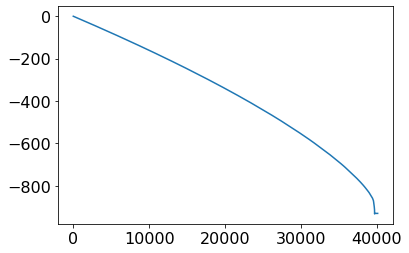

In [179]:
plt.plot(np.unwrap(np.angle(wr.hlms[(2,2)])))

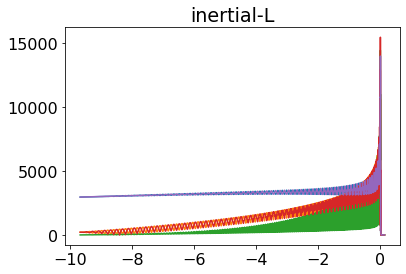

In [180]:
plot_modes(wr)

In [181]:
# old_alpha, old_beta, old_gamma = wr.alpha, wr.beta, wr.gamma

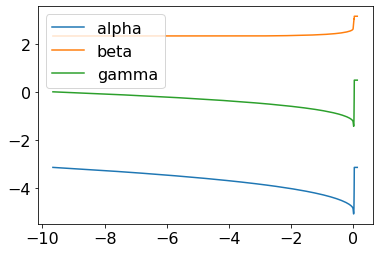

In [182]:
plt.figure()
plt.plot(wr.times, wr.alpha, label='alpha')
plt.plot(wr.times, wr.beta, label='beta')
plt.plot(wr.times, wr.gamma, label='gamma')
plt.legend()

NameError: name 'old_alpha' is not defined

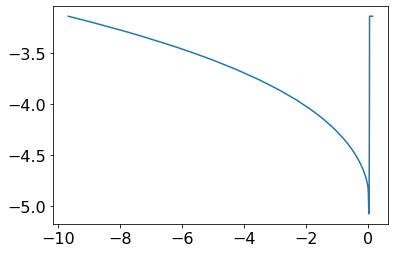

In [183]:
plt.figure()
plt.plot(wr.times, wr.alpha, label='alpha')
plt.plot(wr.times, old_alpha)
plt.legend()

NameError: name 'old_beta' is not defined

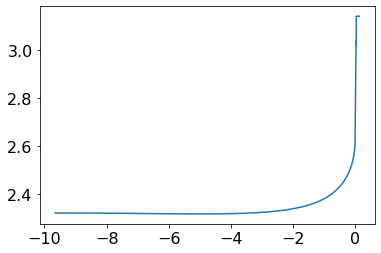

In [184]:
plt.figure()
plt.plot(wr.times, wr.beta, label='beta')
plt.plot(wr.times, old_beta)
plt.legend()

NameError: name 'old_gamma' is not defined

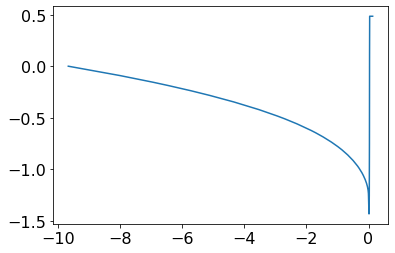

In [185]:
plt.figure()
plt.plot(wr.times, wr.gamma, label='gamma')
plt.plot(wr.times, old_gamma)
plt.legend()

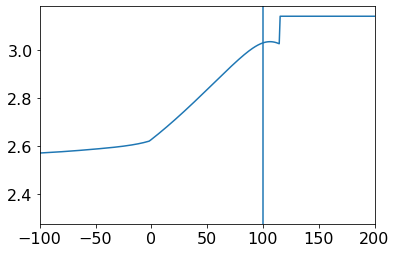

In [207]:
plt.figure()
# plt.plot(phenom.StoM(wr.times, m1+m2), np.abs(wr.hlms[(2,2)]))
# plt.plot(phenom.StoM(wr.times, m1+m2), wr.alpha)
plt.plot(phenom.StoM(wr.times, m1+m2), wr.beta)
plt.xlim(-100,200)
plt.axvline(100)
# plt.yscale('log')

In [187]:
wr.thetaJN > np.pi/2

True

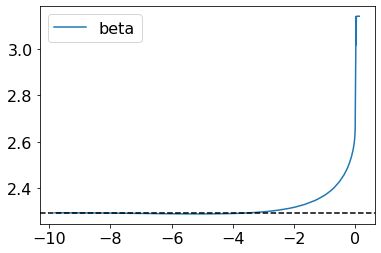

In [152]:
plt.figure()
plt.plot(wr.times, wr.beta, label='beta')
plt.legend()
plt.axhline(wr.thetaJN, c='k', ls='--')

# dev mine

In [68]:
wr_2 = rotations.WaveformRotations(times=times, hlms=hlms, frame='inertial-L', alpha0=alpha0, thetaJN=thetaJN, phi0=phi_aligned)

In [69]:
wr_2.from_inertial_frame_to_j_frame()

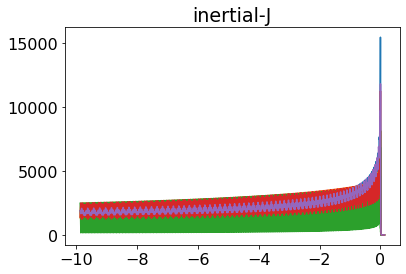

In [70]:
plot_modes(wr_2)

In [71]:
from scrinet.interfaces import rotations

In [72]:
rotations.calc_coprecessing_angles(wr_2.hlms, domain_vals=times)

(array([ 6.80829731e-10, -2.46758950e-05, -4.93526083e-05, ...,
        -6.28318531e+00, -6.28318531e+00, -6.28318531e+00]),
 array([0.98749676, 0.98749676, 0.98749679, ..., 1.57079633, 1.57079633,
        1.57079633]),
 array([-0.00000000e+00,  1.35914248e-05,  2.71828490e-05, ...,
         5.35137576e+00,  5.35137576e+00,  5.35137576e+00]))

In [73]:
Lab = rotations.calc_Lab_tensor(wr_2.hlms)

In [74]:
type(Lab)

numpy.ndarray

In [75]:
Lab.shape

(3, 3, 40909)

In [76]:
wr_2.times.shape

(40909,)

In [77]:
Lab[:,:,0].shape

(3, 3)

In [78]:
from scipy.linalg import eig,norm, eigh

In [79]:
eig(Lab[:,:,0])

(array([3.98455712+0.j, 1.        +0.j, 1.01544288+0.j]),
 array([[ 8.34649856e-01,  5.48816373e-01, -4.64780288e-02],
        [-5.68254437e-10, -8.43856912e-02, -9.96433166e-01],
        [ 5.50780917e-01, -8.31672799e-01,  7.04325047e-02]]))

In [80]:
eigh(Lab[:,:,0])

(array([1.        , 1.01544288, 3.98455712]),
 array([[ 5.48816373e-01, -4.64780288e-02,  8.34649856e-01],
        [-8.43856912e-02, -9.96433166e-01, -5.68254427e-10],
        [-8.31672799e-01,  7.04325047e-02,  5.50780917e-01]]))

In [81]:
ref_direction = np.array([0,0,1])
ref_x = None
xs, ys, zs = [], [], []
for i in range(wr_2.times.shape[0]):
    _L = Lab[:,:,i] # select 3x3 matrix at time i
    
#     vals, vec = eig(_L)
    vals, vec = eigh(_L)
    
#     domiant_index = np.argmax(vals)

#     dominant_vec = vec[:, domiant_index]
    dominant_vec = vec[:, 2]
    
    
    if np.sign(dominant_vec[-1]) != np.sign(ref_direction[-1]):
        dominant_vec *= -1
    
    _x, _y, _z = dominant_vec
    if ref_x is None:
        ref_x = _x
        ref_y = _y
        ref_z = _z
    else:
        if (ref_x*_x < 0) and (ref_y*_y < 0):
            _x *= -1
            _y *= -1
            _z *= -1
    ref_x = _x
    ref_y = _y
    ref_z = _z
    xs.append(_x)
    ys.append(_y)
    zs.append(_z)
    
X = rotations.reflect_unwrap(np.array(xs))
# X = np.array(xs)
Y = np.array(ys)
Z = np.array(zs)

(-0.5, 0.1)

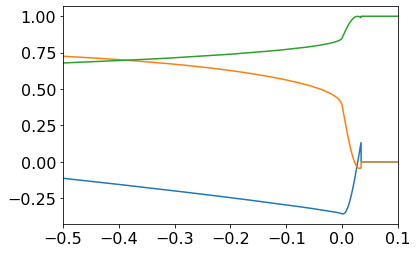

In [82]:
plt.figure()
plt.plot(wr_2.times, X)
plt.plot(wr_2.times, Y)
plt.plot(wr_2.times, Z)
plt.xlim(-0.5,0.1)

In [83]:
beta = np.arccos(Z)

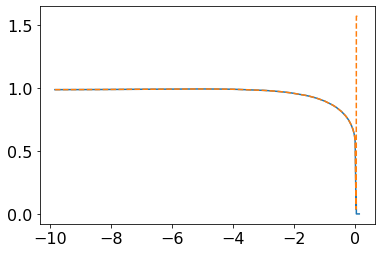

In [84]:
plt.figure()
plt.plot(times, beta)
plt.plot(wr.times, wr.beta, ls='--')

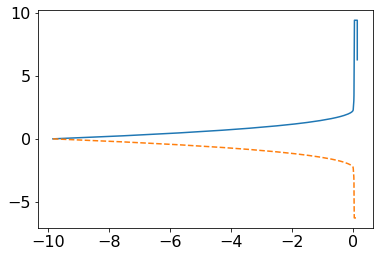

In [85]:
plt.figure()
plt.plot(times, np.unwrap(np.arctan2(Y, X)))
plt.plot(wr.times, wr.alpha, ls='--')

In [86]:
def _LLDominantEigenvector(dpa, dpa_i, i_index):
    """Joink!"""
    dpa = dpa.copy()
    # Make the initial direction closer to RoughInitialEllDirection than not
    if (
        dpa_i[0] * dpa[i_index, 0]
        + dpa_i[1] * dpa[i_index, 1]
        + dpa_i[2] * dpa[i_index, 2]
    ) < 0.0:
        dpa[i_index, 0] *= -1
        dpa[i_index, 1] *= -1
        dpa[i_index, 2] *= -1
    # Now, go through and make the vectors reasonably continuous.
    d = -1
    LastNorm = np.sqrt(dpa[i_index, 0] ** 2 + dpa[i_index, 1] ** 2 + dpa[i_index, 2] ** 2)
    for i in range(i_index - 1, -1, -1):
        Norm = dpa[i, 0] ** 2 + dpa[i, 1] ** 2 + dpa[i, 2] ** 2
        dNorm = (
            (dpa[i, 0] - dpa[i - d, 0]) ** 2
            + (dpa[i, 1] - dpa[i - d, 1]) ** 2
            + (dpa[i, 2] - dpa[i - d, 2]) ** 2
        )
        if dNorm > Norm:
            dpa[i, 0] *= -1
            dpa[i, 1] *= -1
            dpa[i, 2] *= -1
        # While we're here, let's just normalize that last one
        if LastNorm != 0.0 and LastNorm != 1.0:
            dpa[i - d, 0] /= LastNorm
            dpa[i - d, 1] /= LastNorm
            dpa[i - d, 2] /= LastNorm
        LastNorm = np.sqrt(Norm)
    if LastNorm != 0.0 and LastNorm != 1.0:
        dpa[0, 0] /= LastNorm
        dpa[0, 1] /= LastNorm
        dpa[0, 2] /= LastNorm
    d = 1
    LastNorm = np.sqrt(dpa[i_index, 0] ** 2 + dpa[i_index, 1] ** 2 + dpa[i_index, 2] ** 2)
    for i in range(i_index + 1, dpa.shape[0]):
        Norm = dpa[i, 0] ** 2 + dpa[i, 1] ** 2 + dpa[i, 2] ** 2
        dNorm = (
            (dpa[i, 0] - dpa[i - d, 0]) ** 2
            + (dpa[i, 1] - dpa[i - d, 1]) ** 2
            + (dpa[i, 2] - dpa[i - d, 2]) ** 2
        )
        if dNorm > Norm:
            dpa[i, 0] *= -1
            dpa[i, 1] *= -1
            dpa[i, 2] *= -1
        # While we're here, let's just normalize that last one
        if LastNorm != 0.0 and LastNorm != 1.0:
            dpa[i - d, 0] /= LastNorm
            dpa[i - d, 1] /= LastNorm
            dpa[i - d, 2] /= LastNorm
        LastNorm = np.sqrt(Norm)
    if LastNorm != 0.0 and LastNorm != 1.0:
        dpa[-1, 0] /= LastNorm
        dpa[-1, 1] /= LastNorm
        dpa[-1, 2] /= LastNorm
    print(dpa)
    return dpa

In [87]:
Lab.shape

(3, 3, 40909)

In [88]:
Lab.reshape(-1,3,3).shape

(40909, 3, 3)

In [89]:
val, vec = [], []
for i in range(Lab.shape[2]):
    _val, _vec = eigh(Lab[:,:,i])
    val.append(_val)
    vec.append(_vec)
val = np.array(val)
vec = np.array(vec)

In [90]:
vec.shape

(40909, 3, 3)

In [91]:
# dpa = eigenvecs[:, :, 2]  # `eigh` always returns eigenvals in *increasing* order
RoughDirection=np.array([0,0,1])
RoughDirectionIndex=0
dpa = vec[:,:,2]
dpa_out = _LLDominantEigenvector(dpa, dpa_i=RoughDirection, i_index=RoughDirectionIndex)

[[ 8.34649856e-01 -5.68254427e-10  5.50780917e-01]
 [ 8.34649860e-01  2.05957323e-05  5.50780910e-01]
 [ 8.34649871e-01  4.11921482e-05  5.50780892e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [92]:
dpa.shape

(40909, 3)

In [93]:
dpa_out.shape

(40909, 3)

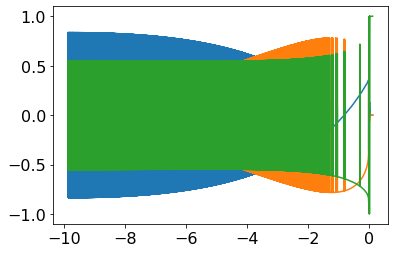

In [94]:
plt.figure()
plt.plot(times, dpa[:,0])
plt.plot(times, dpa[:,1])
plt.plot(times, dpa[:,2])

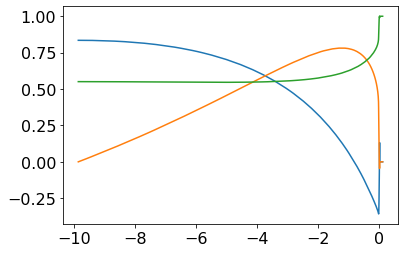

In [95]:
plt.figure()
plt.plot(times, dpa_out[:,0])
plt.plot(times, dpa_out[:,1])
plt.plot(times, dpa_out[:,2])

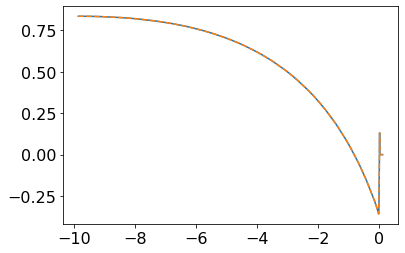

In [96]:
plt.figure()
plt.plot(times, dpa_out[:,0])
plt.plot(wr_2.times, X, ls='--')

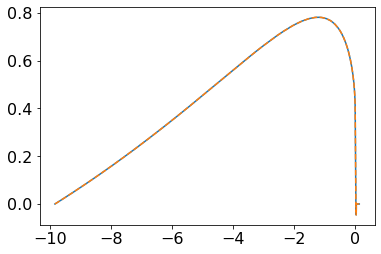

In [97]:
plt.figure()
plt.plot(times, dpa_out[:,1])
plt.plot(wr_2.times, Y, ls='--')
# plt.xlim(-0.1,0.1)

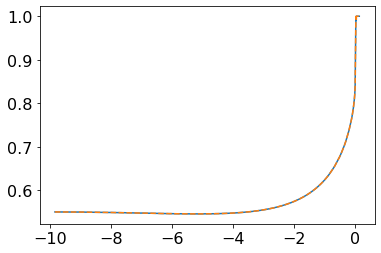

In [98]:
plt.figure()
plt.plot(times, dpa_out[:,2])
plt.plot(wr_2.times, Z, ls='--')
# plt.xlim(-0.1,0.1)

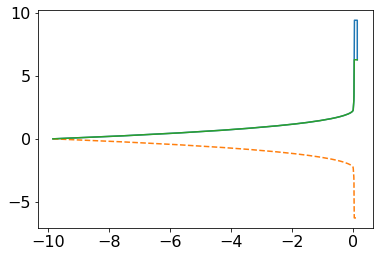

In [99]:
plt.figure()
plt.plot(times, np.unwrap(np.arctan2(Y, X)))
plt.plot(wr.times, wr.alpha, ls='--')

plt.plot(times, np.unwrap(np.arctan2(dpa_out[:,1], dpa_out[:,0])))